In [1]:
import warnings
import pathlib
from datetime import datetime, timedelta
import multiprocessing

import numpy as np
from numpy import ma
import pandas as pd
import xarray as xr
import tqdm

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colorbar import ColorbarBase
from matplotlib import patches

import cartopy.crs as ccrs

import intake
import healpy

In [2]:
tobac_tracks_path = pathlib.Path("/scratch/b/b382728/tobac_tracks/2025/")

In [3]:
ds = xr.open_dataset(tobac_tracks_path/"tobac_20250701-000000_20250801-000000_ICON_tracking_file.nc")

In [4]:
ds

<xarray.Dataset> Size: 941MB
Dimensions:                   (feature: 2954638, cell: 357061,
                               cluster: 2589903, track: 170853)
Coordinates:
  * feature                   (feature) int64 24MB 165 167 ... 5744585 5744586
  * cell                      (cell) int64 3MB 165 167 185 ... 1255062 1255063
  * cluster                   (cluster) int64 21MB 1 2 3 ... 2589902 2589903
  * track                     (track) int64 1MB 1 2 3 4 ... 209767 209771 209775
Data variables: (12/32)
    frame                     (feature) int64 24MB ...
    idx                       (feature) int64 24MB ...
    y                         (feature) float64 24MB ...
    x                         (feature) float64 24MB ...
    detection_pixel_count     (feature) int64 24MB ...
    threshold_value           (feature) int64 24MB ...
    ...                        ...
    cluster_longitude         (cluster) float64 21MB ...
    cluster_latitude          (cluster) float64 21MB ...
    cluster_area              (cluster) float64 21MB ...
    cluster_max_precip        (cluster) float64 21MB ...
    cluster_total_precip      (cluster) float64 21MB ...
    is_track_mcs              (track) bool 171kB ...

In [5]:
track_start_time = ds.cluster_time.astype(int).groupby(ds.cluster_track_id).min().astype("datetime64[ns]")
track_end_time = ds.cluster_time.astype(int).groupby(ds.cluster_track_id).max().astype("datetime64[ns]")

In [6]:
track_lifetime = track_end_time - track_start_time

In [7]:
ds_2045 = xr.open_dataset(
    pathlib.Path("/scratch/b/b382728/tobac_tracks/2045/")/"tobac_20450701-000000_20450801-000000_ICON_tracking_file.nc"
)


In [8]:
track_start_time_2045 = ds_2045.cluster_time.astype(int).groupby(ds_2045.cluster_track_id).min().astype("datetime64[ns]")
track_end_time_2045 = ds_2045.cluster_time.astype(int).groupby(ds_2045.cluster_track_id).max().astype("datetime64[ns]")
track_lifetime_2045 = track_end_time_2045 - track_start_time_2045


(array([1.3466e+04, 1.5263e+04, 1.7685e+04, 2.0629e+04, 1.9232e+04,
        1.6519e+04, 1.2967e+04, 1.0104e+04, 7.9620e+03, 3.5220e+03,
        5.6570e+03, 4.7930e+03, 3.6540e+03, 3.3310e+03, 2.5870e+03,
        2.2350e+03, 1.7440e+03, 1.4740e+03, 6.4700e+02, 1.1490e+03,
        9.6600e+02, 8.1600e+02, 6.7200e+02, 5.8600e+02, 4.8500e+02,
        4.2900e+02, 3.2700e+02, 1.4300e+02, 2.8800e+02, 2.2600e+02,
        2.2500e+02, 1.9200e+02, 1.6700e+02, 1.4400e+02, 1.2500e+02,
        8.6000e+01, 4.6000e+01, 8.7000e+01, 6.1000e+01, 5.9000e+01,
        6.6000e+01, 4.7000e+01, 4.8000e+01, 3.6000e+01, 3.2000e+01,
        1.5000e+01, 2.6000e+01, 2.8000e+01, 2.1000e+01, 1.9000e+01,
        1.9000e+01, 1.9000e+01, 8.0000e+00, 1.2000e+01, 4.0000e+00,
        5.0000e+00, 6.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        4.0000e+00, 0.0000e+00, 7.0000e+00, 3.0000e+00, 4.0000e+00,
        3.0000e+00, 3.0000e+00, 7.0000e+00, 3.0000e+00, 3.0000e+00,
        0.0000e+00, 3.0000e+00, 3.0000e+00, 3.00

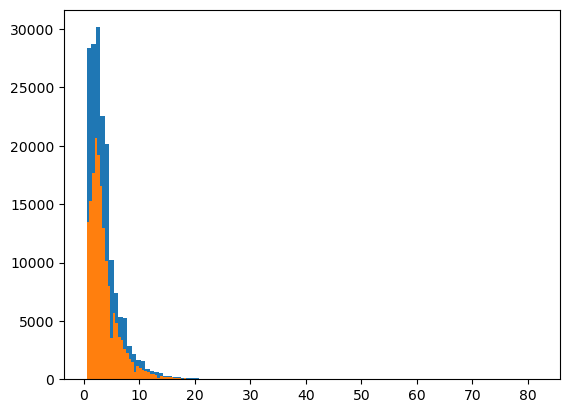

In [9]:
plt.hist(track_lifetime.astype(int)/3.6e12, bins=100)
plt.hist(track_lifetime_2045.astype(int)/3.6e12, bins=100)

In [10]:
ds

<xarray.Dataset> Size: 941MB
Dimensions:                   (feature: 2954638, cell: 357061,
                               cluster: 2589903, track: 170853)
Coordinates:
  * feature                   (feature) int64 24MB 165 167 ... 5744585 5744586
  * cell                      (cell) int64 3MB 165 167 185 ... 1255062 1255063
  * cluster                   (cluster) int64 21MB 1 2 3 ... 2589902 2589903
  * track                     (track) int64 1MB 1 2 3 4 ... 209767 209771 209775
Data variables: (12/32)
    frame                     (feature) int64 24MB ...
    idx                       (feature) int64 24MB ...
    y                         (feature) float64 24MB ...
    x                         (feature) float64 24MB ...
    detection_pixel_count     (feature) int64 24MB ...
    threshold_value           (feature) int64 24MB ...
    ...                        ...
    cluster_longitude         (cluster) float64 21MB ...
    cluster_latitude          (cluster) float64 21MB ...
    cluster_area              (cluster) float64 21MB ...
    cluster_max_precip        (cluster) float64 21MB ...
    cluster_total_precip      (cluster) float64 21MB ...
    is_track_mcs              (track) bool 171kB ...

In [11]:
t = np.datetime64("2025-07-07T15:00:00", "ns")
date = datetime.strptime(str(t.astype("datetime64[s]")), "%Y-%m-%dT%H:%M:%S")

In [12]:
t, date

(numpy.datetime64('2025-07-07T15:00:00.000000000'),
 datetime.datetime(2025, 7, 7, 15, 0))

In [13]:
masks_path = pathlib.Path("/scratch/b/b382728/tobac_features")
mask_file = list((masks_path / date.strftime("%Y/%m/%d")).glob(f'tobac_{date.strftime("%Y%m%d-%H%M%S")}*.nc'))

In [14]:
if len(mask_file):
    mask_ds = xr.open_dataset(mask_file[0]).sel(time=t)

In [15]:
mask_ds

<xarray.Dataset> Size: 19MB
Dimensions:                   (feature: 7717, lat: 1200, lon: 3600)
Coordinates:
  * feature                   (feature) int64 62kB 1 2 3 4 ... 7715 7716 7717
    time                      datetime64[ns] 8B 2025-07-07T15:00:00
  * lat                       (lat) float64 10kB 59.95 59.85 ... -59.85 -59.95
  * lon                       (lon) float64 29kB 0.05 0.15 0.25 ... 359.9 360.0
Data variables: (12/19)
    frame                     (feature) int64 62kB ...
    idx                       (feature) int64 62kB ...
    y                         (feature) float64 62kB ...
    x                         (feature) float64 62kB ...
    detection_pixel_count     (feature) int64 62kB ...
    threshold_value           (feature) int64 62kB ...
    ...                        ...
    mean_OLR                  (feature) float64 62kB ...
    min_OLR                   (feature) float64 62kB ...
    area                      (feature) float64 62kB ...
    max_precip                (feature) float64 62kB ...
    total_precip              (feature) float64 62kB ...
    all_feature_labels        (lat, lon) int32 17MB ...

In [16]:
feature_track_map = np.zeros(ds.feature.max().item() + 1)
feature_track_map[ds.feature.values] = ds.feature_track_id.values

In [17]:
feature_track_map

array([     0.,      0.,      0., ..., 209207., 209543., 209775.])

In [18]:
track_labels = feature_track_map[mask_ds.all_feature_labels]

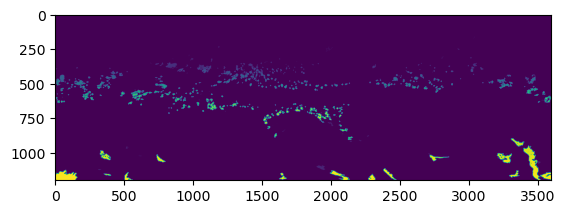

In [19]:
plt.imshow(track_labels, origin="upper")

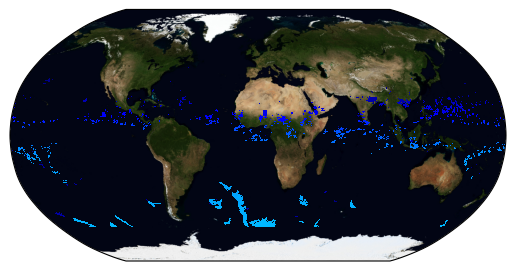

In [20]:
fig, ax = plt.subplots(subplot_kw = dict(projection=ccrs.Robinson()))

ax.imshow(
    plt.imread("/home/b/b382728/data/world.200407.3x5400x2700.jpg"),
    extent=[-180,180,-90,90], transform=ccrs.PlateCarree()
)

ax.imshow(
    ma.array(track_labels % (ds.track.max().item()/100), mask=track_labels==0), 
    cmap="jet", vmin=1, vmax=ds.track.max().item()/100, interpolation="nearest", 
    extent=[0,360,-60,60], transform=ccrs.PlateCarree()
)

In [21]:
cat = intake.open_catalog("https://data.nextgems-h2020.eu/catalog.yaml")
dataset = cat.ICON.ngc4008(chunks="auto", time="PT15M", zoom=9).to_dask()

/home/b/b382728/miniconda3/envs/tobac/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [22]:
dataset.sel(time=t)

<xarray.Dataset> Size: 75MB
Dimensions:  (crs: 1, cell: 3145728)
Coordinates:
  * crs      (crs) float32 4B nan
    time     datetime64[ns] 8B 2025-07-07T15:00:00
Dimensions without coordinates: cell
Data variables:
    pr       (cell) float32 13MB dask.array<chunksize=(49152,), meta=np.ndarray>
    qv2m     (cell) float32 13MB dask.array<chunksize=(49152,), meta=np.ndarray>
    rlut     (cell) float32 13MB dask.array<chunksize=(49152,), meta=np.ndarray>
    rsds     (cell) float32 13MB dask.array<chunksize=(49152,), meta=np.ndarray>
    sfcwind  (cell) float32 13MB dask.array<chunksize=(49152,), meta=np.ndarray>
    tas      (cell) float32 13MB dask.array<chunksize=(49152,), meta=np.ndarray>

In [23]:
alpha_cmap = np.ones([256,4])
alpha_cmap[:,-1] = np.linspace(0,1,256)
alpha_cmap = ListedColormap(alpha_cmap)

In [24]:
pix = xr.DataArray(
    healpy.ang2pix(dataset.crs.healpix_nside, *np.meshgrid(mask_ds.lon, mask_ds.lat), nest=True, lonlat=True),
    coords=(mask_ds.lat, mask_ds.lon),
)

In [25]:
olr = dataset.rlut.sel(time=t, cell=pix)

In [26]:
olr

<xarray.DataArray 'rlut' (lat: 1200, lon: 3600)> Size: 17MB
dask.array<reshape, shape=(1200, 3600), dtype=float32, chunksize=(1200, 3600), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 8B 2025-07-07T15:00:00
  * lat      (lat) float64 10kB 59.95 59.85 59.75 59.65 ... -59.75 -59.85 -59.95
  * lon      (lon) float64 29kB 0.05 0.15 0.25 0.35 ... 359.7 359.8 359.9 360.0
Attributes:
    cell_methods:   time: mean cell: mean
    component:      atmo
    grid_mapping:   crs
    long_name:      toa outgoing longwave radiation
    standard_name:  toa_outgoing_longwave_flux
    units:          W m-2
    vgrid:          toa

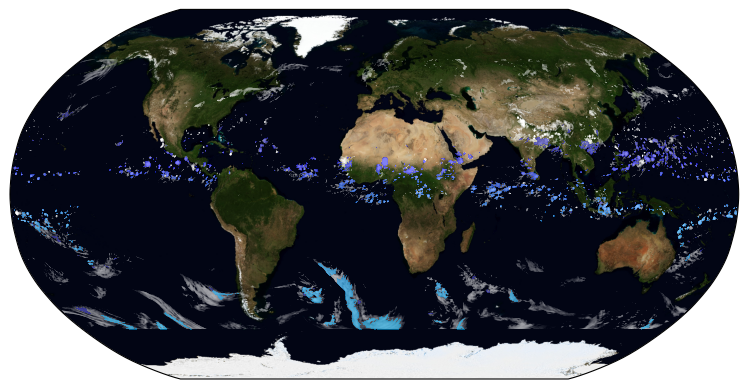

In [27]:
fig, ax = plt.subplots(subplot_kw = dict(projection=ccrs.Robinson()), figsize=(9.6,4.8))

ax.imshow(
    plt.imread("/home/b/b382728/data/world.200407.3x5400x2700.jpg"),
    extent=[-180,180,-90,90], transform=ccrs.PlateCarree()
)

ax.imshow(
    -olr, cmap=alpha_cmap, vmin=-200, vmax=-100, 
    extent=[0,360,-60,60], transform=ccrs.PlateCarree()
)

ax.imshow(
    ma.array(track_labels % (ds.track.max().item()/100), mask=track_labels==0), 
    cmap="jet", vmin=1, vmax=ds.track.max().item()/100, interpolation="nearest", 
    extent=[0,360,-60,60], transform=ccrs.PlateCarree(), alpha=0.5
)

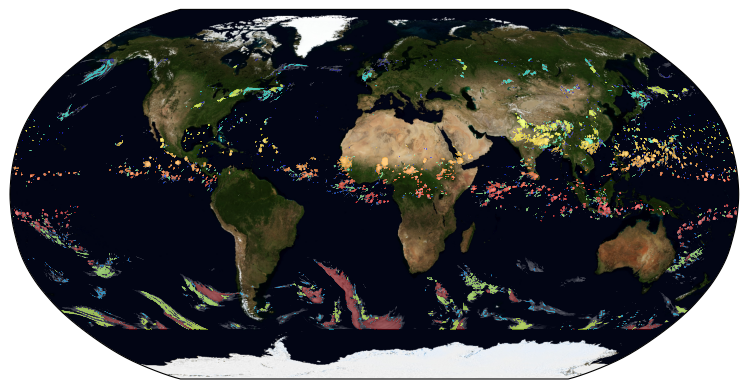

In [28]:
fig, ax = plt.subplots(subplot_kw = dict(projection=ccrs.Robinson()), figsize=(9.6,4.8))

ax.imshow(
    plt.imread("/home/b/b382728/data/world.200407.3x5400x2700.jpg"),
    extent=[-180,180,-90,90], transform=ccrs.PlateCarree()
)

ax.imshow(
    -olr, cmap=alpha_cmap, vmin=-200, vmax=-100, 
    extent=[0,360,-60,60], transform=ccrs.PlateCarree()
)

ax.imshow(
    ma.array(
        mask_ds.all_feature_labels.values, 
        mask=mask_ds.all_feature_labels.values==0
    ), 
    cmap="jet", interpolation="nearest", 
    extent=[0,360,-60,60], transform=ccrs.PlateCarree(), alpha=0.5
)

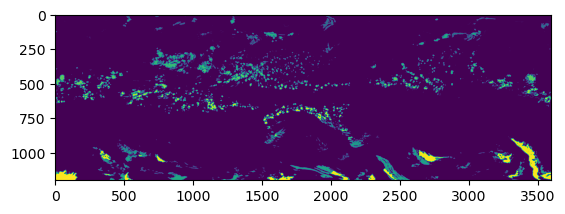

In [29]:
plt.imshow(mask_ds.all_feature_labels.values)